# First DNN using MNIST data set 


In [2]:
# import the libraries 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


In [3]:
# Define the parameters 
batch_size = 128
num_classes = 10
epochs = 5

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

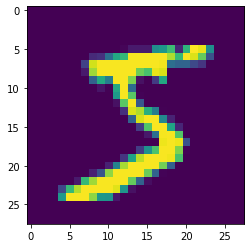

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


5


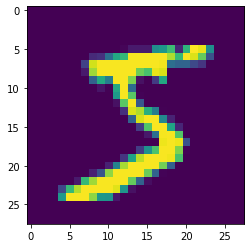

In [8]:
plt.imshow(x_train[0])
print(y_train[0])


In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:

model = keras.Sequential()

    # Input Layer : Number of Neurons equal to the nunmber of input pixedl in an image
model.add(    keras.layers.Flatten(input_shape=(28,28)))
    
    # Hidden Layer
model.add(keras.layers.Dense(128 , activation=tf.nn.relu))
    
    # Output Layer number of Neurons equals to number of output variables    
model.add(    keras.layers.Dense(10 , activation=tf.nn.softmax))



Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# View the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [15]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 7s 111us/step - loss: 0.3349 - acc: 0.9077 - val_loss: 0.1814 - val_acc: 0.9460
Epoch 2/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.1578 - acc: 0.9551 - val_loss: 0.1399 - val_acc: 0.9584
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.1138 - acc: 0.9670 - val_loss: 0.1032 - val_acc: 0.9685
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0879 - acc: 0.9749 - val_loss: 0.0939 - val_acc: 0.9716
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0722 - acc: 0.9787 - val_loss: 0.0850 - val_acc: 0.9731


In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08495720806298777
Test accuracy: 0.9731


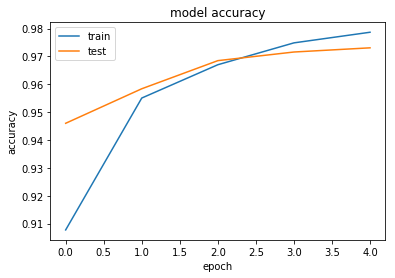

In [17]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


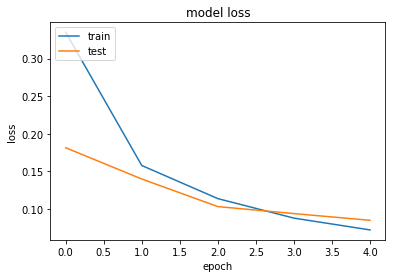

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()